## Test Battery

Change your models in their definition and run the test

In [1]:
from cells.hallermann2012 import iteration1 # Your Model to test
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp


In [2]:
reload(iteration1)
cellmodule = iteration1

In [6]:
reload(iteration1)
cellmodule = iteration1

rmp.calculateRMP(cellmodule.SPI6)

-81.51938360851153

MaxDef for0.0 is-81.60237962305644
MaxDef for-0.025 is-83.30706284790048
MaxDef for-0.05 is-85.0910419148195
MaxDef for-0.07500000000000001 is-86.90305776151203
MaxDef for-0.1 is-88.7375134641412
MaxDef for-0.125 is-90.58634125594159
MaxDef for-0.15000000000000002 is-92.44056627935383
MaxDef for-0.17500000000000002 is-94.2916246335475


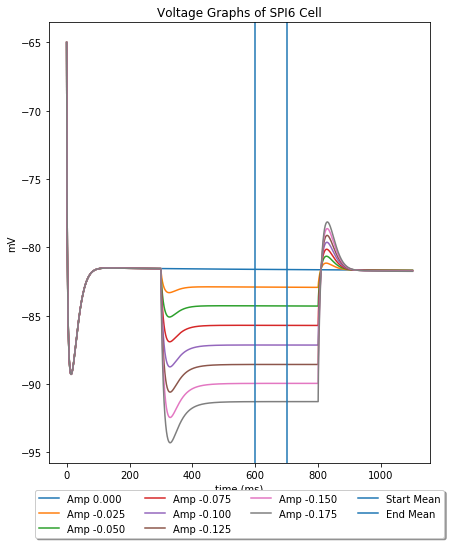

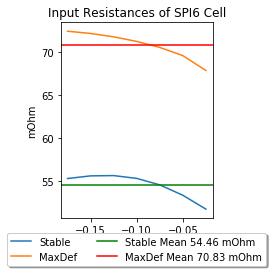

In [7]:

inputresistances = generic.calculateInputResistance(cellmodule.SPI6, mult=-0.025, iterations=8, plot=True, delay=300, duration=500)

In [52]:
inputresistances[0][0]

-0.025

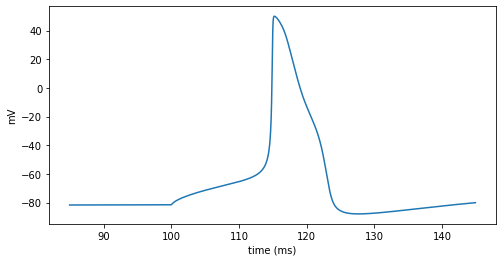

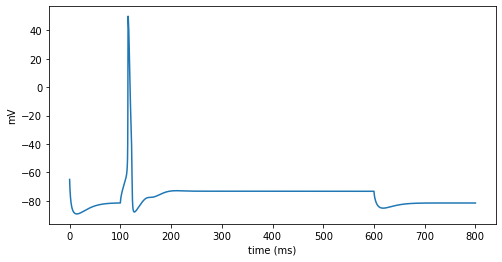

In [8]:
foundtrace = ap.findFirstApWithinMS(cellmodule.SPI6, ms= 15)
aptime = foundtrace["aps"][0]
aptrace = generic.isolateTime(foundtrace, aptime,30)

generic.plotTrace(aptrace)
generic.plotTrace(foundtrace)

In [31]:
def phasePlanePlot(tracein):
    copytrace = copy.copy(tracein)
    time = copytrace["t"].max() - copytrace["t"].min()
    hertz = copytrace["t"].shape[0]/time
    dT = 1/hertz
    
    print(hertz)
    print(dT)

    vgradient = np.gradient(copytrace["v"],copytrace["t"]) # Is this correct?
    
    fig = pyplot.figure(figsize=(20,12)) # Default figsize is (8,6)
    ax = pyplot.subplot(131)
    voltage = copytrace["v"] 
    ax.plot(voltage,vgradient)
    ax.set_xlim(-80, 80)
    ax.set_ylim(-50,500)
    return tracein
    
    

40.016673614008845
0.024989583333331455


{'v': array([-65.6714915 , -65.67146831, -65.67144515, ..., -75.3845407 ,
        -75.37059513, -75.35665463]),
 't': array([ 83.975,  84.   ,  84.025, ..., 143.9  , 143.925, 143.95 ]),
 'aps': array([113.975, 197.525, 281.45 , 365.425, 449.5  , 533.65 ]),
 'cellbuilder': cells.layer_v_1.SPI6,
 'params': {'dur': 500, 'delay': 100, 'amp': 0.17500000000000002}}

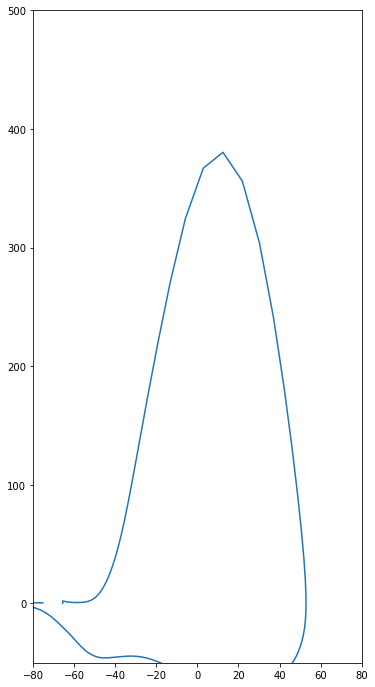

In [32]:
phasePlanePlot(aptrace)


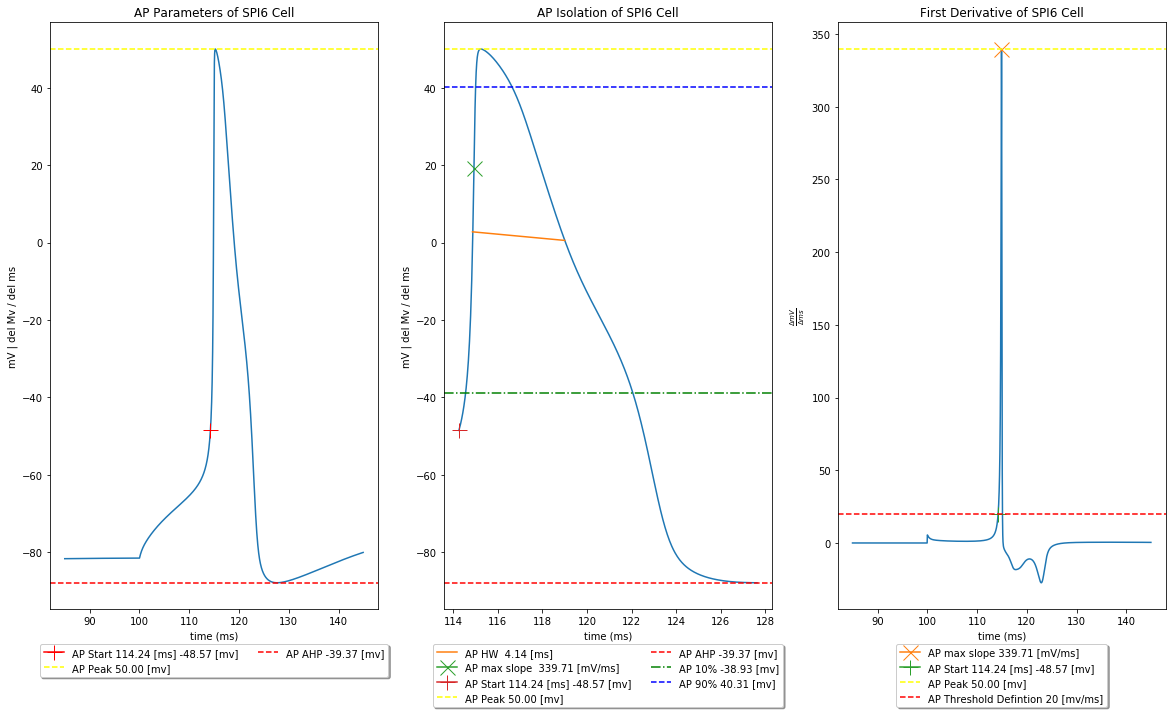

In [9]:
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

In [10]:
reload(layer_v_1)
cellmodule = layer_v_1

trace = generic.stimulate(cellmodule.SPI6, param={"dur":500, "delay":100, "amp":0})

NameError: name 'layer_v_1' is not defined

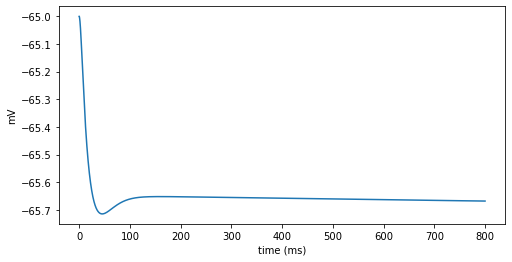

In [35]:
generic.plotTrace(trace)